In [1]:
# Initial imports
import os # Miscellaneous operating system interfaces (os.getenv)
import requests # requests.get
import pandas as pd
from dotenv import load_dotenv #Reads the key-value pair from .env file and adds them to environment variable.
from pathlib import Path
import json # lightweight data interchange format 
import matplotlib.pyplot as plt

%matplotlib inline
import FundamentalAnalysis as fa
import alpaca_trade_api as tradeapi


Bad key "text.kerning_factor" on line 4 in
C:\Users\Nipune\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Load .env enviroment variables
load_dotenv()
from pathlib import Path
env_path = Path('C:/Users/Nipune/python-homework/.env')

In [3]:
# Set FA API key
api_key = os.getenv("FA")

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
# Set the file path
sp_data = Path("Resources/sp.csv")
sp_symbols_data = Path("Resources/sp500_symbols.csv")
sp_ticker_data = Path("Resources/sp500_ticker.csv")


In [6]:
# Read whale returns csv
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
sp_df = pd.read_csv(sp_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df.sort_index(ascending = True, inplace = True)

sp_symbols = pd.read_csv(sp_symbols_data, index_col="Symbol", infer_datetime_format=True, parse_dates=True)
sp_symbols.sort_index(ascending = True, inplace = True)

sp_ticker = pd.read_csv(sp_ticker_data, index_col="Symbol", infer_datetime_format=True, parse_dates=True)
sp_ticker.sort_index(ascending = True, inplace = True)

In [7]:
# Drop nulls
sp_df = sp_df.dropna()

In [8]:
# master_list = []
# for i in target_items:
#         data_dict = {}
#         data_dict['marketplace'] = 'ebay'
#         data_dict['date_retrieved'] = date.today()
#         data_dict['link'] = i.get('a',{'href'})
#         master_list.append(data_dict)


In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-31", tz="America/New_York").isoformat() 
start = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat() 
end = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat() # last year

# Set the tickers
tickers = ["TSLA", "NIO", "AAPL", "PFE", "MSFT", "MRNA", "ZM", "AMZN", "NNDM", "CRM", "NVDA"]
dict = {'stock':'', 'segment':''}  
marketcaps = {}
segments = {}
for stock in tickers:
    profile = fa.profile(stock, api_key) 
    try: 
        marketcaps[stock] = int(profile.iloc[22])
        segment = str(profile.iloc[26])[5:]
        segments[stock] = segment[:-28]
    except: continue
    

## Create the shares DataFrame with `tickers` as index
#df_shares = pd.DataFrame(shares_data, index=tickers)

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [10]:
# # Format current date as ISO format
# today = pd.Timestamp("2020-07-31", tz="America/New_York").isoformat() 
# start = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat() #1/1/2019?
# end = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat() #31/12/2019?

# # Set the tickers
# tickers = ["TSLA", "NIO", "AAPL", "PFE", "MSFT", "MRNA", "ZM", "AMZN", "NNDM", "CRM", "NVDA"]
# dict = {'stock':'', 'segment':''}  
# marketcaps = {}
# segments = {}
# for stock in tickers:
#     profile = fa.profile(stock, api_key) 
#     try: 
#         marketcaps[stock] = int(profile.iloc[22])
#         segment = str(profile.iloc[26])[5:]
#         segments[stock] = segment[:-28]
#     except: continue
    

# ## Create the shares DataFrame with `tickers` as index
# #df_shares = pd.DataFrame(shares_data, index=tickers)

# # Set timeframe to '1D' for Alpaca API
# timeframe = "1D"

# # Get current closing prices for SPY and AGG
# df_portfolio = alpaca.get_barset(
#     tickers,
#     timeframe,
#     start = today,
#     end = today
# ).df

In [11]:
marketcaps_df = pd.DataFrame(marketcaps.items(), columns=['stock', 'marketcap'])
segments_df = pd.DataFrame(segments.items(), columns=['stock', 'marketcap']).rename(columns={
    "marketcap":"sector"
})

In [12]:
marketcaps_df.head(11)

,stock,marketcap
0,TSLA,668905310000
1,NIO,75981275000
2,AAPL,2255968800000
3,PFE,204604719000
4,MSFT,1681606440000
5,MRNA,41339826000
6,ZM,96475890000
7,AMZN,1634167820000
8,NNDM,1261523840
9,CRM,204223349000


In [13]:
segments_df.head(11)

,stock,sector
0,TSLA,Consumer Cyclical
1,NIO,Consumer Cyclical
2,AAPL,Technology
3,PFE,Healthcare
4,MSFT,Technology
5,MRNA,Healthcare
6,ZM,Communication Services
7,AMZN,Consumer Cyclical
8,NNDM,Technology
9,CRM,Technology


In [14]:
segments_df=segments_df.reset_index()

In [15]:
segments_df.groupby(by='sector')
segments_df['sector'].value_counts(sort=True, ascending=True)

Communication Services    1
Healthcare                2
Consumer Cyclical         3
Technology                5
Name: sector, dtype: int64

In [16]:
segments_df['sector'].value_counts(sort=True, ascending=True)

Communication Services    1
Healthcare                2
Consumer Cyclical         3
Technology                5
Name: sector, dtype: int64

In [17]:
segments_df['sector'].value_counts(sort=True, normalize=True)

Technology                0.454545
Consumer Cyclical         0.272727
Healthcare                0.181818
Communication Services    0.090909
Name: sector, dtype: float64

In [18]:
Sector_df = segments_df['sector'].value_counts(sort=True, normalize=True)
Sector_df.columns  = ["Sector", "Sector %"]
Sector_df

Technology                0.454545
Consumer Cyclical         0.272727
Healthcare                0.181818
Communication Services    0.090909
Name: sector, dtype: float64

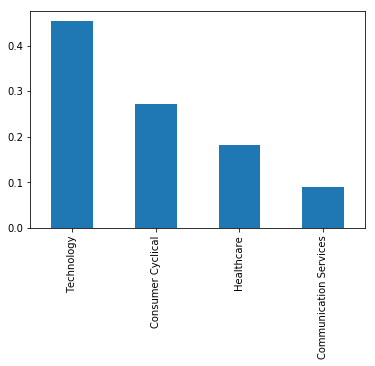

In [19]:
Sector_df.plot(kind="bar")

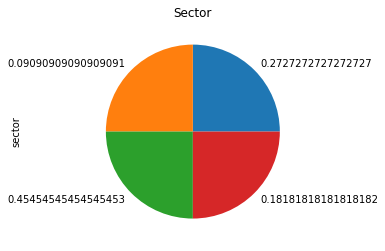

In [20]:
fig1, ax1 = plt.subplots()
plt.title('Sector')
plt.axis('equal')
Sector_df.value_counts(sort=False).plot.pie()
plt.show()

In [21]:
joined_df = pd.concat([marketcaps_df, segments], axis="columns", join="inner")
joined_df.head(12)


TypeError: cannot concatenate object of type "<class 'dict'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [ ]:
joined_symbol_df = pd.concat([sp_symbols, sp_ticker], axis="columns", join="inner")
joined_symbol_df.head(500)

In [ ]:
stock_data = fa.stock_data("TSLA", period="ytd", interval="1d")

In [ ]:
sp_df.head()

In [ ]:
stock_data

In [ ]:
growth_annually = fa.financial_statement_growth("TSLA", api_key, period="annual")

In [ ]:
growth_annually

In [ ]:
# # Collect general company information
# profile = fa.profile(ticker, api_key)

# # Collect recent company quotes
# quotes = fa.quote(ticker, api_key)

# # Collect market cap and enterprise value
# entreprise_value = fa.enterprise(ticker, api_key)

# # Show recommendations of Analysts
# ratings = fa.rating(ticker, api_key)

# # Obtain DCFs over time
# dcf_annually = fa.discounted_cash_flow(ticker, api_key, period="annual")
# dcf_quarterly = fa.discounted_cash_flow(ticker, api_key, period="quarter")

# # Collect the Balance Sheet statements
# balance_sheet_annually = fa.balance_sheet_statement(ticker, api_key, period="annual")
# balance_sheet_quarterly = fa.balance_sheet_statement(ticker, api_key, period="quarter")

# # Collect the Income Statements
# income_statement_annually = fa.income_statement(ticker, api_key, period="annual")
# income_statement_quarterly = fa.income_statement(ticker, api_key, period="quarter")

# # Collect the Cash Flow Statements
# cash_flow_statement_annually = fa.cash_flow_statement(ticker, api_key, period="annual")
# cash_flow_statement_quarterly = fa.cash_flow_statement(ticker, api_key, period="quarter")

# # Show Key Metrics
# key_metrics_annually = fa.key_metrics(ticker, api_key, period="annual")
# key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")

# # Show a large set of in-depth ratios
# financial_ratios_annually = fa.financial_ratios(ticker, api_key, period="annual")
# financial_ratios_quarterly = fa.financial_ratios(ticker, api_key, period="quarter")

# # Show the growth of the company
# growth_annually = fa.financial_statement_growth(ticker, api_key, period="annual")
# growth_quarterly = fa.financial_statement_growth(ticker, api_key, period="quarter")

# # Download general stock data
# stock_data = fa.stock_data(ticker, period="ytd", interval="1d")

# # Download detailed stock data
# stock_data_detailed = fa.stock_data_detailed(ticker, api_key, begin="2000-01-01", end="2020-01-01")
